In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram
from math import pi
%matplotlib inline

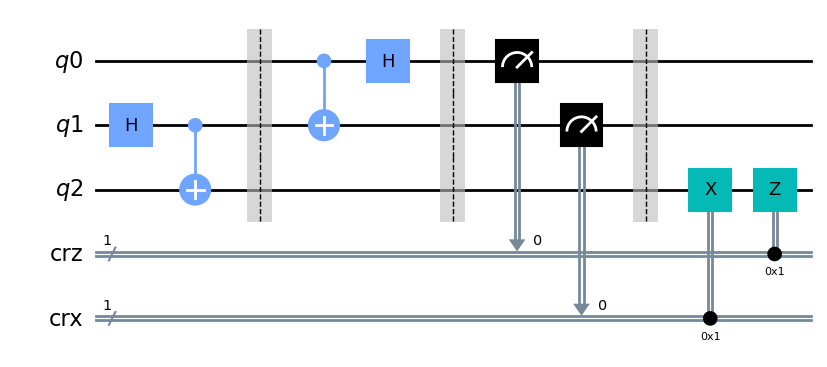

In [4]:
# initialize 3-qubit circuit with named registers
q0 = QuantumRegister(1, name="q0") # Olivia's source qubit to teleport
q1 = QuantumRegister(1, name="q1") # middle qubit sent to Olivia (half of Bell state pair)
q2 = QuantumRegister(1, name="q2") # Barron's destination qubit (half of Bell state pair)

crz = ClassicalRegister(1, name="crz") # Olivia's measurement of her source qubit
crx = ClassicalRegister(1, name="crx") # Olivia's measurement of middle qubit (half of Bell state pair)

circuit = QuantumCircuit(q0, q1, q2, crz, crx)

# initialize Olivia's qubit (quantum state to teleport)
# circuit.rx(pi/3, q0)
# circuit.barrier()

# create Bell state pair
circuit.h(q1)
circuit.cx(q1, q2)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(q0, q1)
circuit.h(q0)
circuit.barrier()
circuit.measure(q0, crz)
circuit.measure(q1, crx)
circuit.barrier()

# Barron transforms his qubit based on measurement results
circuit.x(q2).c_if(crx, 1)  # apply X gate if cr_x is 1
circuit.z(q2).c_if(crz, 1)  # apply Z gate if cr_z is 1

circuit.draw(output='mpl')

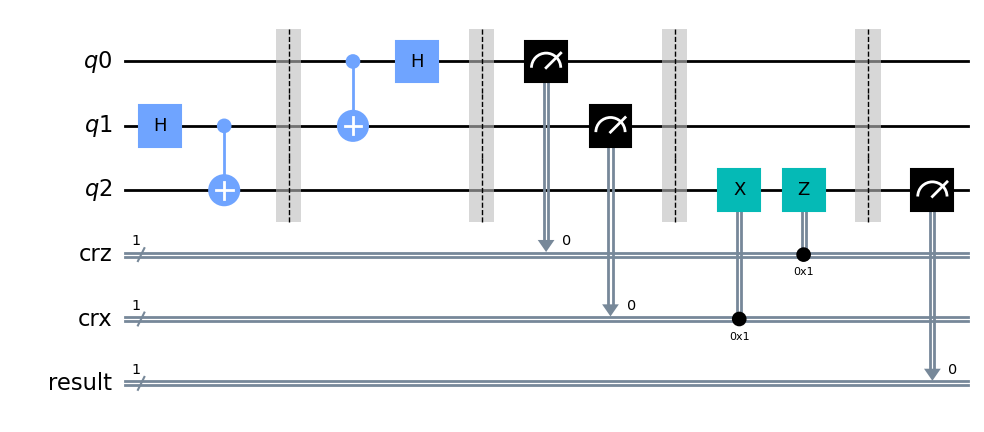

In [5]:
# add final measurement of Barron's qubit
cr_result = ClassicalRegister(1, name="result")
circuit.barrier()
circuit.add_register(cr_result)
circuit.measure(2, 2)
circuit.draw(output='mpl')

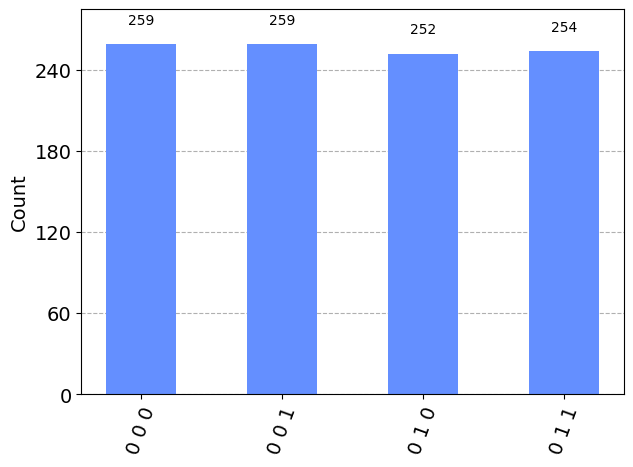

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts())

In [7]:
# As we can see, the circuit now has a X Gate. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBM (IBM's quantum computer)
quantum_circuit = circuit
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.12.2', qobj_id='', job_id='e76eba7a-b750-40eb-8dc5-ed978fef52da', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 250, '0x3': 266, '0x0': 264, '0x2': 244}), header=QobjExperimentHeader(creg_sizes=[['crz', 1], ['crx', 1], ['result', 1]], global_phase=0.0, memory_slots=3, n_qubits=3, name='circuit-120', qreg_sizes=[['q0', 1], ['q1', 1], ['q2', 1]], metadata={}), status=DONE, seed_simulator=2132217134, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': False, 'parallel_shots': 8, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'num_clbits': 3, 'parallel_state_update': 1, 'num_qubits': 3, 'device': 'CPU', 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.015140629)], date=2024-04-12T13:11:18.891528, status=COMPLETED, header=None, metadata={'time_taken_exe

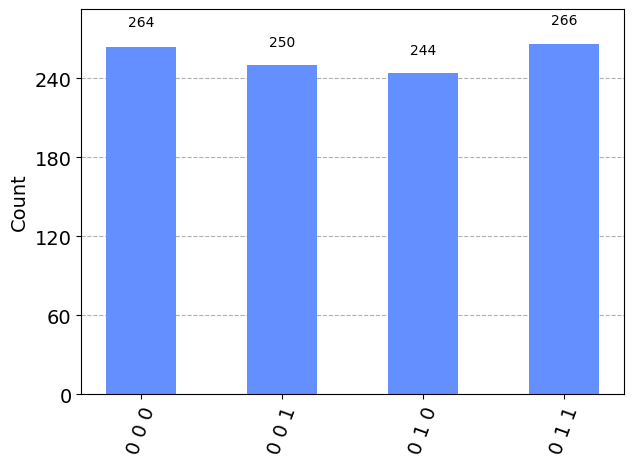

In [8]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)

In [9]:
# Let us see the counts
print(counts)

{'0 0 1': 250, '0 1 1': 266, '0 0 0': 264, '0 1 0': 244}


In [10]:
# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import IBMQ

# This step is for first time users.
IBMQ.save_account('8d9fd4cfb1139b39e920a5e17a2d932dcf89a73f3c9441d31cf617139f3cb47ac4eb912c2ada92145a2c9bef7d5c22ca825b5cbe3a6590b599bbce8872f1d216')
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

/tmp/ipykernel_230387/4155119734.py:6: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('8d9fd4cfb1139b39e920a5e17a2d932dcf89a73f3c9441d31cf617139f3cb47ac4eb912c2ada92145a2c9bef7d5c22ca825b5cbe3a6590b599bbce8872f1d216')
/tmp/ipykernel_230387/4155119734.py:6: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('8d9fd4cfb1139b39e920a5e17a2d932d

In [11]:
# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])

['ibmq_qasm_simulator', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibm_brisbane', 'ibm_kyoto', 'ibm_osaka']


In [10]:
# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
#backend = provider.get_backend('ibmq_qasm_simulator') 

backend = provider.get_backend('ibm_brisbane') 
job = execute(quantum_circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()

Job Status: job is queued (None)

In [1]:
pip freeze

asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1698341106958/work
comm @ file:///home/conda/feedstock_root/build_artifacts/comm_1710320294760/work
debugpy @ file:///croot/debugpy_1690905042057/work
decorator @ file:///home/conda/feedstock_root/build_artifacts/decorator_1641555617451/work
exceptiongroup @ file:///home/conda/feedstock_root/build_artifacts/exceptiongroup_1704921103267/work
executing @ file:///home/conda/feedstock_root/build_artifacts/executing_1698579936712/work
importlib_metadata @ file:///home/conda/feedstock_root/build_artifacts/importlib-metadata_1710971335535/work
ipykernel @ file:///home/conda/feedstock_root/build_artifacts/ipykernel_1708996548741/work
ipython @ file:///home/conda/feedstock_root/build_artifacts/ipython_1709559745751/work
jedi @ file:///home/conda/feedstock_root/build_artifacts/jedi_1696326070614/work
jupyter_client @ file:///home/conda/feedstock_root/build_artifacts/jupyter_client_1710255804825/work
jupyter_core @ file:///ho

In [ ]:
|